In [3]:
from binance.client import Client
client = Client()
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "6 months ago UTC")

In [6]:
import pandas as pd
import pandas_ta as ta

df = pd.DataFrame(klines, columns = ["open_time","open","high","low","close","vol","close_time","quote_vol"
                                     ,"trades","taker_base_vol","taker_quote_vol","ignore"])

df = df[["open_time","open","high","low","close"]]
df["open_time"] = pd.to_datetime(df["open_time"], unit='ms')
df["open"] = df.open.astype(float)
df["high"] = df.high.astype(float)
df["low"] = df.low.astype(float)
df["close"] = df.close.astype(float)

df["atr"] = ta.atr(high=df.high,low=df.low,close=df.close)
df["atr"] = df.atr.rolling(window=30).mean()

df.set_index("open_time", inplace=True)
df

,open,high,low,close,atr
open_time,,,,,
2023-12-16 06:00:00,42266.09,42320.02,42141.82,42205.05,NaN
2023-12-16 07:00:00,42205.05,42271.10,42161.61,42222.67,NaN
2023-12-16 08:00:00,42222.67,42260.68,42097.18,42179.13,NaN
2023-12-16 09:00:00,42179.13,42284.00,42179.12,42209.49,NaN
2023-12-16 10:00:00,42209.48,42261.10,42191.10,42261.09,NaN
...,...,...,...,...,...
2024-06-16 01:00:00,66161.96,66218.48,66102.03,66175.68,326.849265
2024-06-16 02:00:00,66175.68,66182.26,66114.27,66142.86,317.313842
2024-06-16 03:00:00,66142.86,66164.30,66076.55,66146.00,306.521424


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from IPython import display 
from IPython.display import HTML
pd.set_option('mode.chained_assignment', None)

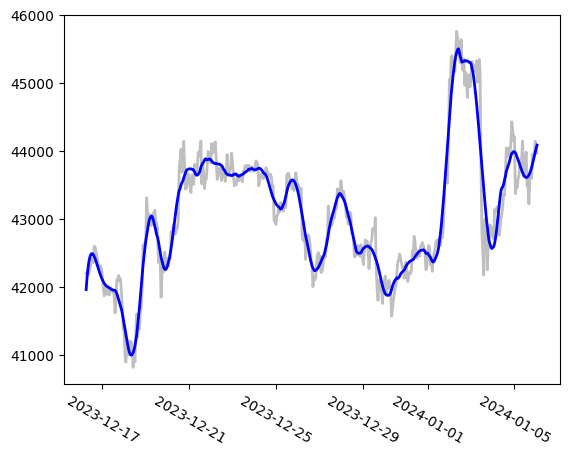

In [12]:
df2 = df.iloc[0:500]
df2["close_smooth"] = savgol_filter(df2.close, 49, 5)
fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth = ax.plot(df2.index, df2.close_smooth, c='b', lw=2, zorder=5)
plt.show()

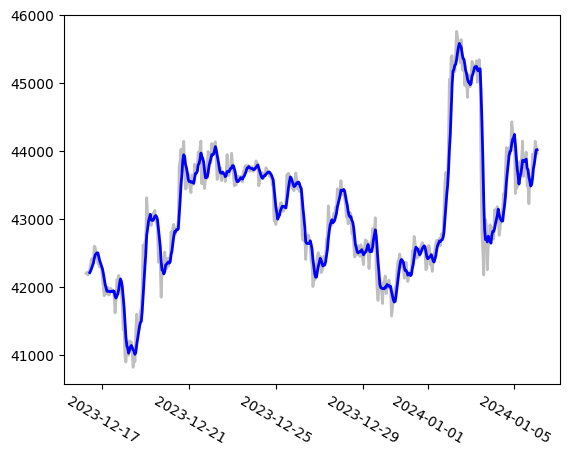

In [13]:
# Assuming 'close_smooth' is a simple moving average of the 'close' column
df2['close_smooth'] = df2['close'].rolling(window=5).mean()

# Now you can plot as before
fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2['close'], c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth = ax.plot(df2.index, df2['close_smooth'], c='b', lw=2, zorder=5)
plt.show()

[  6  72 132 281 412]


/var/folders/5f/1zf902pj3r74d6cxx3w0j0gw0000gn/T/ipykernel_13945/1793748310.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peaks, = ax.plot(df2.index[peaks_idx], df2.close_smooth[peaks_idx], c="r",linestyle="None",markersize=10.0,marker="o",zorder=10)
/var/folders/5f/1zf902pj3r74d6cxx3w0j0gw0000gn/T/ipykernel_13945/1793748310.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  troughs, = ax.plot(df2.index[troughs_idx], df2.close_smooth[troughs_idx], c="g",linestyle="None",markersize=10.0,marker="o",zorder=10)


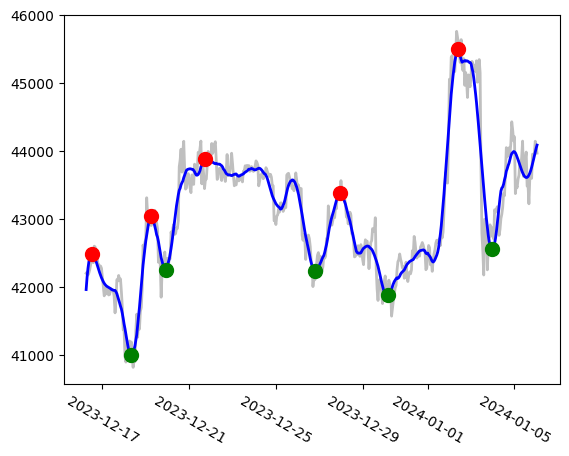

In [15]:
df2 = df.iloc[0:500]
df2["close_smooth"] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth = ax.plot(df2.index, df2.close_smooth, c='b', lw=2, zorder=5)

atr = df2.atr.iloc[-1]
peaks_idx, _ = find_peaks(df2.close_smooth, distance=15, width=3, prominence=atr)
print(peaks_idx)
troughs_idx, _ = find_peaks(-1*df2.close_smooth, distance=15, width=3, prominence=atr)
peaks, = ax.plot(df2.index[peaks_idx], df2.close_smooth[peaks_idx], c="r",linestyle="None",markersize=10.0,marker="o",zorder=10)
troughs, = ax.plot(df2.index[troughs_idx], df2.close_smooth[troughs_idx], c="g",linestyle="None",markersize=10.0,marker="o",zorder=10)
plt.show()